# Исследование объявлений о продаже квартир

На основе данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, нужно научиться определять рыночную стоимость объектов недвижимости, установить параметры квартир в зависимости удаленности от центра. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы:

**1. Изучить общую информацию о данных**

**2. Предобработка данных:**

* Найти и изучить пропущенные значения;
* Изменить типы данных переменных, если необходимо;
* Устранить явные и неявные дубликаты в столбцах с названиями;
* Устранить редкие и аномальные значения

**3. Добавить в данные новые столбцы с расчетом параметров, которые будут в дальнейшем применятся для исследования**

**4. Исследовательский анализ данных:**

* Исследование исходных параметров объектов
* Исследование длительности размещения объявления
* Исследование влияния различных параметров на стоимость объектов
* Исследование стоимости квадратного метра в населенных пунктах
* Исследование зависимости стоимости объектов в Санкт-Петербурге от расстояния до центра города.

## Задачи:

1. Выяснить, что влияет на скорость продажи квартир
2. Выявить зависимость между ценой и различными параметрами объектов

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# чтение файла
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим какое распределение имеют количественные переменные в наборе данных.

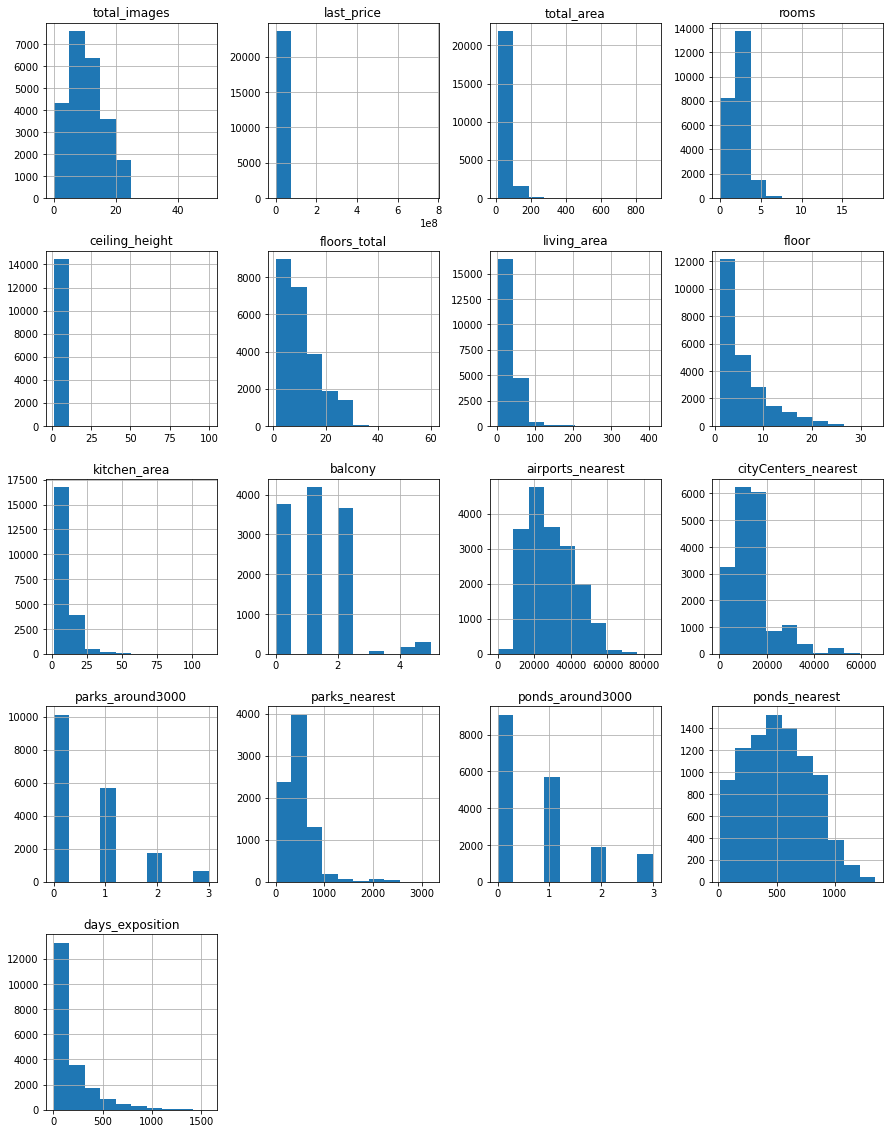

In [4]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

#### Удаление пропусков

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
        .set_title('Пропуски в данных, %' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

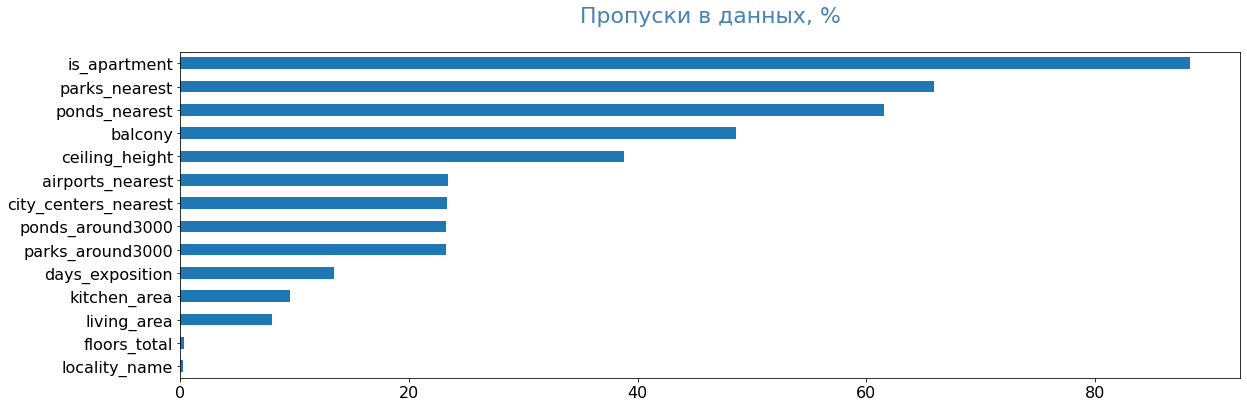

In [8]:
pass_value_barh(data)

Пропуски имеются в 14 столбцах.

В столбце `balcony`, отражающем количество балконов в квартире, пропущенным значениям присвоим 0, так как пропуски вероятно связаны с тем, что в квартирах нет балконов. В столбце `is_apartment` значения пропущены для квартир, которые скорее всего не являются апартаментами, поэтому запоним их значениями *False*.

In [9]:
data = data.fillna(value={'balcony': 0, 'is_apartment': False})

Пропущенные названия населенных пунктов в столбце `locality_name` заменим на *unknown*.

In [10]:
data = data.fillna(value={'locality_name': 'unknown'})

У квартир с 0 комнат скорее всего нет отдельной кухни, поэтому можно заменить отсутствующие значения в столбце `kitchen_area` значения на 0. 

In [11]:
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

Сохраним значение длины исходного датафрейма, чтобы потом убедиться, что не было удалено более 10% исходных данных.

In [12]:
len_row_data = len(data)
len_row_data

23699

Проверим, корректность значений площадей в данных. Жилая площадь и кухня в сумме не должны превышать 90% от общей площади, т.к. есть коридоры, сан.узлы, балконы.

In [13]:
data[data['total_area'] * 0.9 <= (data['living_area'] + data['kitchen_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,...,6.2,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,...,9.0,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,False,...,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,False,...,16.0,0.0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,False,...,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,False,...,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,False,...,15.3,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


В исходных данных есть 481 объявление, в котором сумма жилой площади и площади кухни оказалась больше 90%. Причиной этого может быть неправильное заполнение объявлений (например, включение площади кухни или коридоров в жилую площадь). Так как нельзя оценить, в чем ошиблись при заполнении объявления, то удалим строки с аномальными значениями площадей, так как в сумме они составляют 2% и мы не сильно повлияем на объем выборки.

In [14]:
data = data[(data['living_area'].isna()) | (data['kitchen_area'].isna()) | \
       (data['total_area'] * 0.9 > (data['living_area'] + data['kitchen_area']))]

In [15]:
((data['total_area'] * 0.9 <= (data['living_area'] + data['kitchen_area'])).sum()) / len(data)

0.0

Заполнение пропусков в столбце `kitchen_area` медианными значениями и в столбце `living_area`средней долей от общей площади привело к возникновению аномалий. Оставим пропуски в столбце `kitchen_area` и `living_area` пустыми.

Пропуски в столбце `ceiling_height` для всех городов кроме Санкт-Петербурга заменим на медианное значение по городам. 

Для Санкт-Петербурга при заполнении медианой необходимо учесть, что в исторических районах высота потолков изначально выше, поэтому посчитаем медиану для объектов в историческом районе и современном районе Санкт-Петербурга отдельно. Историческими будем считать районы в радиусе 5 км от центра города. 

In [16]:
print('Медиана и среднее значение высоты потолка для исторического центра Санкт-Петербурга:', \
      (
    data[(data['city_centers_nearest'] <= 5000) & (data['locality_name'] == 'Санкт-Петербург')]['ceiling_height']
    .apply(['mean', 'median'])
), sep='\n')
print()
print('Медиана и среднее значение высоты потолка для современных районов Санкт-Петербурга:', \
       (
    data[(data['city_centers_nearest'] > 5000) & (data['locality_name'] == 'Санкт-Петербург')]['ceiling_height']
    .apply(['mean', 'median'])
), sep='\n')

Медиана и среднее значение высоты потолка для исторического центра Санкт-Петербурга:
mean      3.204491
median    3.100000
Name: ceiling_height, dtype: float64

Медиана и среднее значение высоты потолка для современных районов Санкт-Петербурга:
mean      2.724435
median    2.650000
Name: ceiling_height, dtype: float64


In [17]:
median_ceiling_cities = data[data['locality_name'] != 'Санкт-Петербург']['ceiling_height'].median()
median_ceiling_spb_center = (
    data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'] <= 5000)]['ceiling_height']
    .median()
)
median_ceiling_spb_modern = (
    data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'] > 5000)]['ceiling_height']
    .median()
)

In [18]:
def fill_ceiling_height(row):
    if np.isnan(row['ceiling_height']):
        if row['locality_name'] != 'Санкт-Петербург':
            return median_ceiling_cities
        else:
            if row['city_centers_nearest'] <= 5000:
                return median_ceiling_spb_center
            else:
                return median_ceiling_spb_modern
    return row['ceiling_height']

In [19]:
data['ceiling_height'] = data.apply(fill_ceiling_height, axis=1)

Строки с пропусками в столбце `floors_total` удалим, так как их количество минимально по сравнению с объемом выборки.

In [20]:
data = data[~data['floors_total'].isna()]

В столбцах `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` пропущены картографические данные, в частности для небольших населенных пунктов, что говорит, скорее всего, об отсутствии аэропортов, парков или прудов поблизости, парки и пруды поблизости также могут отсутствовать и в больших городах. Также пропуски могли возникнуть при некорректной выгрузке данных.

Оставим пропущенные значения пустыми.

Пропущенные значения в столбце`days_exposition` также оставим пустыми.

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2037
balcony                     0
locality_name               0
airports_nearest         5401
city_centers_nearest     5378
parks_around3000         5377
parks_nearest           15264
ponds_around3000         5377
ponds_nearest           14259
days_exposition          3093
dtype: int64

#### Изменение типов данных

В столбце `last_price` и столбцах с картографическими данными поменяем тип данных на integer, так как эти значения не имеют дробной части и с целыми числами работать удобнее. Также заменим на integer тип данных в столбцах `days_exposition`, `balcony`, `floors_total`, так как эти значения не могут иметь дробной части.

In [22]:
data = data.astype({'last_price': 'int', 'balcony': 'int'})

In [23]:
# изменим типы данных для столбцов, в которых встречаются пропуски значений
data['floors_total'] = data['floors_total'].astype('Int64')
data['days_exposition'] = data['days_exposition'].round(0).astype('Int64')
data['airports_nearest'] = data['airports_nearest'].round(0).astype('Int64')
data['city_centers_nearest'] = data['city_centers_nearest'].round(0).astype('Int64')
data['parks_around3000'] = data['parks_around3000'].round(0).astype('Int64')
data['parks_nearest'] = data['parks_nearest'].round(0).astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].round(0).astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].round(0).astype('Int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23133 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23133 non-null  int64         
 1   last_price            23133 non-null  int32         
 2   total_area            23133 non-null  float64       
 3   first_day_exposition  23133 non-null  datetime64[ns]
 4   rooms                 23133 non-null  int64         
 5   ceiling_height        23133 non-null  float64       
 6   floors_total          23133 non-null  Int64         
 7   living_area           21263 non-null  float64       
 8   floor                 23133 non-null  int64         
 9   is_apartment          23133 non-null  bool          
 10  studio                23133 non-null  bool          
 11  open_plan             23133 non-null  bool          
 12  kitchen_area          21096 non-null  float64       
 13  balcony         

#### Обработаем дубликаты

Рассмотрим уникальные значения в столбце `locality_name` и удалим дубликаты.

In [25]:
locality_name = sorted(data['locality_name'].unique(), key=lambda x: x.split()[-1])
locality_name

['unknown',
 'деревня Агалатово',
 'посёлок Александровская',
 'посёлок Алексеевка',
 'посёлок Аннино',
 'поселок Аннино',
 'деревня Аро',
 'поселок Барышево',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Старые Бегуницы',
 'деревня Белогорка',
 'посёлок Белоостров',
 'Бокситогорск',
 'поселок городского типа Красный Бор',
 'Сосновый Бор',
 'посёлок городского типа Красный Бор',
 'деревня Чудской Бор',
 'деревня Бор',
 'деревня Трубников Бор',
 'посёлок Пансионат Зелёный Бор',
 'поселок Пансионат Зелёный Бор',
 'посёлок Бугры',
 'поселок Бугры',
 'городской посёлок Будогощь',
 'деревня Ваганово',
 'посёлок городского типа Важины',
 'деревня Вартемяги',
 'деревня Малое Верево',
 'поселок станции Вещево',
 'посёлок при железнодорожной станции Вещево',
 'городской посёлок Виллози',
 'посёлок городского типа Вознесенье',
 'посёлок Возрождение',
 'поселок Возрождение',
 'поселок Войсковицы',
 'посёлок Войскорово',
 'поселок Володарское',
 'Волосово',
 'Волхов',
 'деревня Большая Вруда'

In [26]:
data['locality_name'] = data['locality_name'].replace({'посёлок': 'поселок', 'при железнодорожной станции': 'станции'}, \
                                                      regex=True)
data['locality_name'] = data['locality_name'].replace({'городской поселок': 'поселок городского типа'}, regex=True)  

In [27]:
data['locality_name'] = (
    data['locality_name']
    .replace({'деревня Гарболово': 'поселок Гарболово','поселок станции Громово': 'поселок Громово', 
             'поселок Рябово': 'поселок городского типа Рябово', 'Никольское': 'село Никольское', 
             'деревня Калитино': 'поселок Калитино', 'поселок Лесное': 'коттеджный поселок Лесное',
             'садовое товарищество Приладожский': 'поселок городского типа Приладожский',
             'деревня Рабитицы': 'поселок Рабитицы', 'садовое товарищество Рахья': 'поселок городского типа Рахья',
             'поселок Мурино': 'Мурино', 'поселок станции Громово': 'поселок Громово', 
             'деревня Кудрово': 'Кудрово', 'городской поселок Лесогорский': 'поселок городского типа Лесогорский',
             'поселок Любань': 'Любань', 'городской поселок Мга': 'поселок городского типа Мга',
             'посёлок Мурино': 'Мурино'}, regex=True)
)

Проверим, что не осталось неявных дубликатов.

In [28]:
locality_name = sorted(data['locality_name'].unique(), key=lambda x: x.split()[-1])
locality_name

['unknown',
 'деревня Агалатово',
 'поселок Александровская',
 'поселок Алексеевка',
 'поселок Аннино',
 'деревня Аро',
 'поселок Барышево',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Старые Бегуницы',
 'деревня Белогорка',
 'поселок Белоостров',
 'Бокситогорск',
 'поселок городского типа Красный Бор',
 'Сосновый Бор',
 'деревня Чудской Бор',
 'деревня Бор',
 'деревня Трубников Бор',
 'поселок Пансионат Зелёный Бор',
 'поселок Бугры',
 'поселок городского типа Будогощь',
 'деревня Ваганово',
 'поселок городского типа Важины',
 'деревня Вартемяги',
 'деревня Малое Верево',
 'поселок станции Вещево',
 'поселок городского типа Виллози',
 'поселок городского типа Вознесенье',
 'поселок Возрождение',
 'поселок Войсковицы',
 'поселок Войскорово',
 'поселок Володарское',
 'Волосово',
 'Волхов',
 'деревня Большая Вруда',
 'Всеволожск',
 'Выборг',
 'поселок городского типа Вырица',
 'деревня Выскатка',
 'поселок Высокоключевой',
 'Высоцк',
 'поселок Гаврилово',
 'поселок Гарболово',
 'Га

In [29]:
data['locality_name'].nunique()

310

#### Обработаем аномальные значения

В столбце `ceiling_height` есть выбивающиеся значения 25 м и 32 м, которые скорее всего являются вещественными значениями 2.5 м и 3.2. Обработаем все значения, превышающие 20 м.

In [30]:
np.sort(data['ceiling_height'].unique())

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.25,  2.3 ,  2.34,  2.4 ,  2.45,
        2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,
        2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,
        2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,
        2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,
        2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,
        2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,
        3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,
        3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,
        3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,  3.27,
        3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,  3.36,
        3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,
        3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,
        3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,  3.66,
        3.67,  3.68,

In [31]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data['ceiling_height'] / 10

Построим гистограммы для количественных переменных.

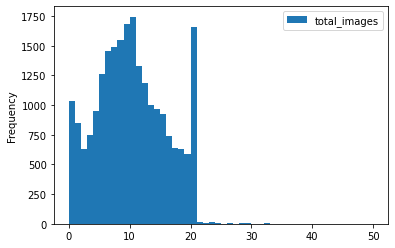

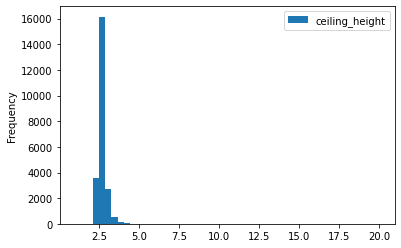

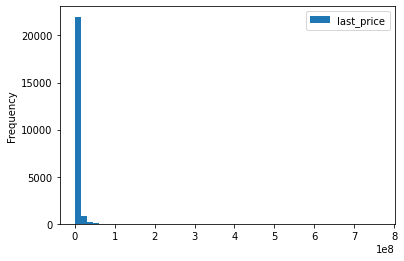

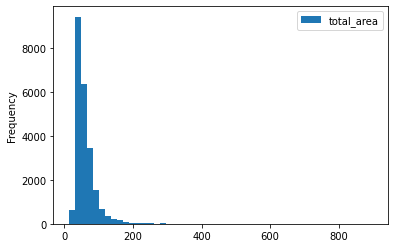

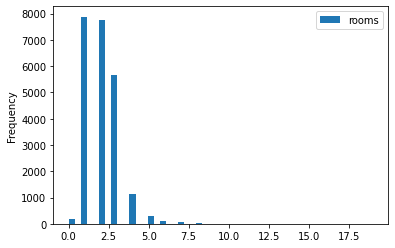

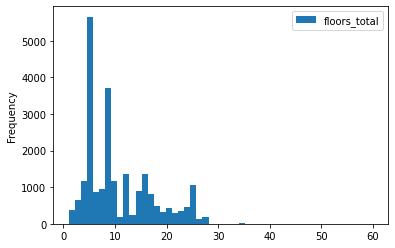

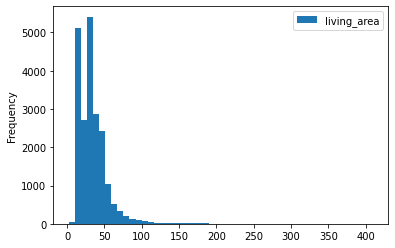

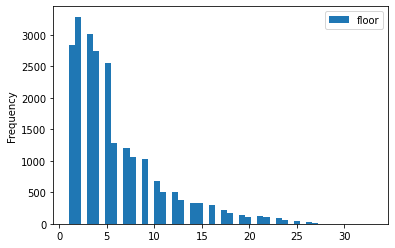

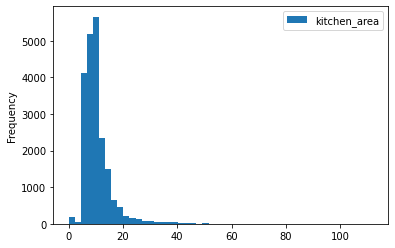

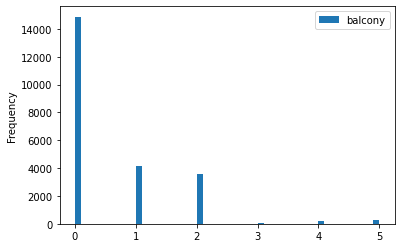

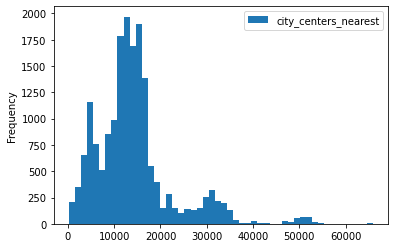

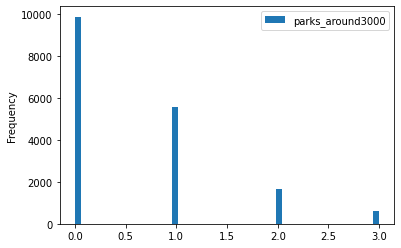

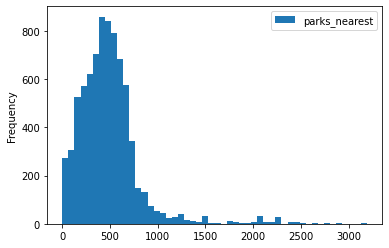

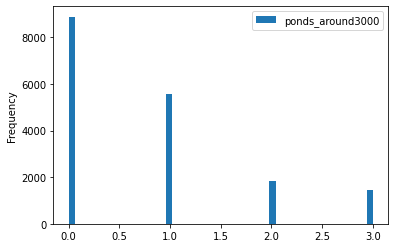

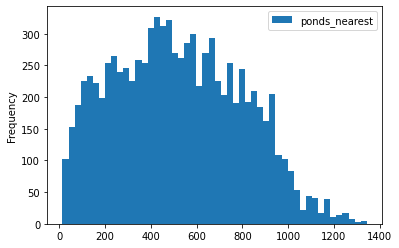

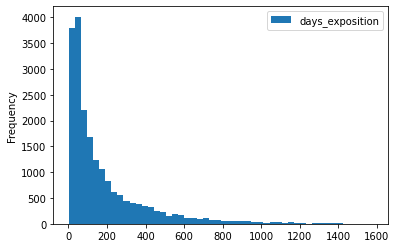

In [32]:
columns_to_hist = ['total_images', 'ceiling_height', 'last_price', 'total_area', 'rooms', 'floors_total', 'living_area', 'floor',\
                   'kitchen_area', 'balcony', 'city_centers_nearest', 'parks_around3000', 'parks_nearest',\
                   'ponds_around3000', 'ponds_nearest', 'days_exposition']

for col in columns_to_hist:
    data.plot(y=col, kind='hist', bins=50)

In [33]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,133.00","23,133.00","23,133.00","20,040.00","23,133.00","21,263.00","21,096.00","23,133.00","23,133.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,0.00,1.00,1.00
mean,2.07,60.23,2.70,181.05,"6,511,400.43",34.15,10.37,5.89,10.70
median,2.00,52.00,2.65,95.00,"4,600,000.00",30.00,9.00,4.00,9.00
max,19.00,900.00,20.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [34]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7882
2,7769
3,5653
4,1139
5,315
0,188
6,97
7,59
8,12
9,8


In [35]:
# check
data.living_area.value_counts().to_frame().sort_index().head(20)

,living_area
2.00,2
3.00,2
5.00,1
5.40,1
6.00,1
6.50,1
8.00,2
8.30,1
8.40,1
8.50,1


Удалим редкие и аномальные значения:

* Квартиры с количеством комнат более 8 встречаются очень редко, поэтому удалим данные объявления.
* Дома этажностью выше 27 этажей также редко встречаются в нашем датасете.
* В столбце `ceiling_height` есть неправдоподобно низкие значения (менее 2,2м) и высокие значения (выше 4 м), которые встречаются очень редко. Удалим строки с данными значениями.
* В столбце `total_area` значения менее 20 м$^2$ являются аномально низкими, а значения более 250 м$^2$ встречаются очень редко.
* В столбце `kitchen_area` выбивающимися значениями являются площади более 40 м$^2$ и менее 4 м$^2$.
* В столбце `last_price` значения менее 300 тыс. руб. и более 25 млн. руб. также встречаются очень редко.
* В столбце `days_exposition` значения более 1000 дней являются аномально высокими.
* Квартиры с жилой площадью менее 8 м$^2$ встречаются очень редко и скорее всего являются аномалиями.

In [36]:
data = data.query('rooms < 10 and \
                   floors_total <= 27 and \
                   ceiling_height >=2.2 and ceiling_height <= 4 and \
                   total_area > 20 and total_area < 250 and \
                   (kitchen_area.isna() or kitchen_area == 0 or (kitchen_area <= 40 and kitchen_area >= 4)) and \
                   last_price > 3e5 and last_price < 25e6 and \
                   (days_exposition < 1000 or days_exposition.isna()) and \
                   (living_area >= 8 or living_area.isna())').reset_index()

In [37]:
print(f'{(len(data) / len_row_data):.1%} данных осталось')

93.6% данных осталось


### Посчитайте и добавьте в таблицу новые столбцы

Рассчитаем цену одного квадратного метра.

In [38]:
data['one_square_meter_price'] = (data['last_price'] / data['total_area']).round(0)

Добавим столбцы *день недели*, *месяц*, *год* публикации объявления.

In [39]:
data['weekday_of_exposition'] = data['first_day_exposition'].dt.weekday
data['month_of_exposition'] = data['first_day_exposition'].dt.month
data['year_of_exposition'] = data['first_day_exposition'].dt.year

Добавим столбец типа этажа квартиры.

In [40]:
def floor_type(row):
    if row['floor'] <= 0:
        raise ValueError(f'Некорректное значение этажа {row["floor"]} при формировании типа этажа')
        
    if row['floor'] == 1:
        return 'первый'
    
    if not isinstance(row['floors_total'], pd._libs.missing.NAType) and row['floor'] == row['floors_total']:
        return 'последний'
     
    return 'другой'

In [41]:
data['floor_type'] = data.apply(floor_type, axis=1)

Добавим столбец расстояние до центра города.

In [42]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype(float).round()

In [43]:
data.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_square_meter_price,weekday_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centers_nearest_km
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,482,2,755,<NA>,120370.0,3,3,2019,другой,16.0
1,1,7,3350000,40.40,2018-12-04,1,2.60,11,18.60,1,...,<NA>,0,<NA>,81,82921.0,1,12,2018,первый,19.0
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,...,90,2,574,558,92786.0,3,8,2015,другой,14.0
3,5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,...,<NA>,<NA>,<NA>,55,95066.0,0,9,2018,другой,NaN
4,6,6,3700000,37.30,2017-11-02,1,2.60,26,10.60,6,...,<NA>,0,<NA>,155,99196.0,3,11,2017,другой,19.0
5,7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,...,<NA>,0,<NA>,<NA>,110545.0,3,4,2019,другой,12.0
6,8,20,2900000,33.16,2018-05-23,1,2.60,27,15.43,26,...,<NA>,<NA>,<NA>,189,87455.0,2,5,2018,другой,NaN
7,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,<NA>,0,<NA>,289,88525.0,6,2,2017,другой,15.0
8,10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,...,310,2,553,137,127525.0,3,11,2017,другой,14.0
9,11,9,3300000,44.00,2018-08-27,2,2.60,5,31.00,4,...,<NA>,0,<NA>,7,75000.0,0,8,2018,другой,52.0


### Проведите исследовательский анализ данных

Построим гистограммы для различных параметров объектов недвижимости.

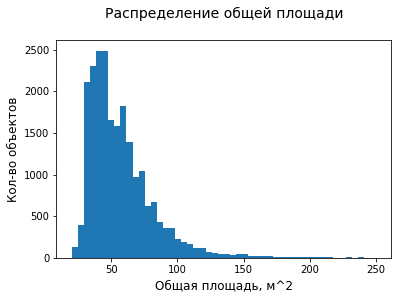

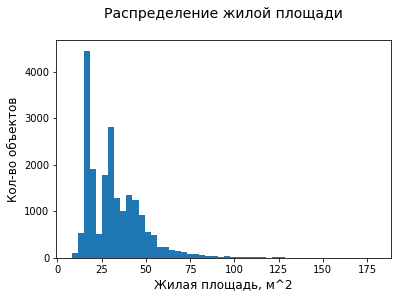

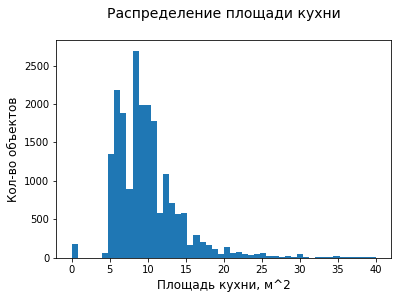

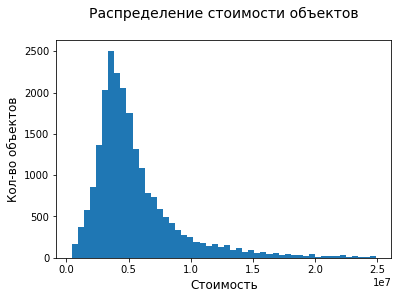

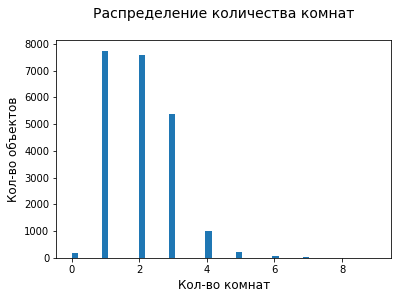

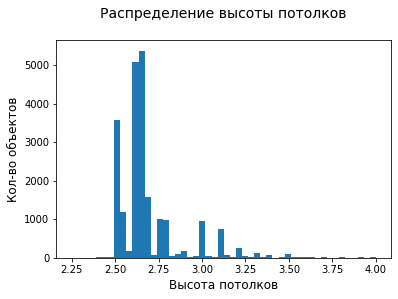

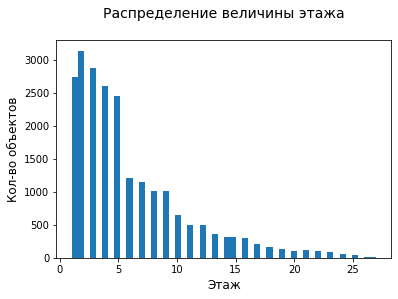

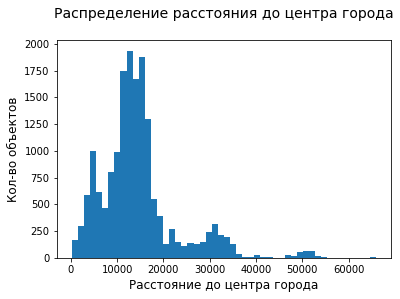

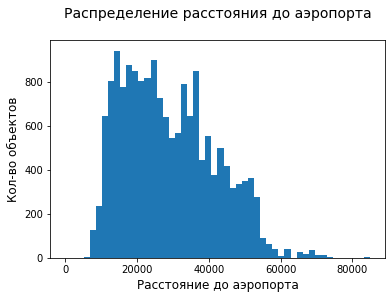

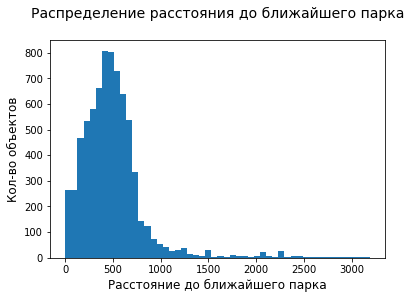

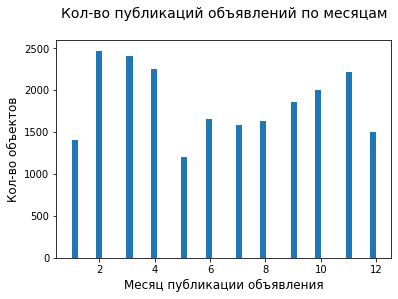

In [44]:
parameters = ['city_centers_nearest', 'airports_nearest', 'parks_nearest', \
             'month_of_exposition']
k = {'total_area': ['Распределение общей площади', 'Общая площадь, м^2', 'Кол-во объектов'], \
     'living_area': ['Распределение жилой площади',  'Жилая площадь, м^2', 'Кол-во объектов'], \
     'kitchen_area': ['Распределение площади кухни',  'Площадь кухни, м^2', 'Кол-во объектов'], \
     'last_price': ['Распределение стоимости объектов',  'Стоимость', 'Кол-во объектов'], \
     'rooms': ['Распределение количества комнат',  'Кол-во комнат', 'Кол-во объектов'], \
     'ceiling_height': ['Распределение высоты потолков',  'Высота потолков', 'Кол-во объектов'],\
     'floor': ['Распределение величины этажа',  'Этаж', 'Кол-во объектов'],\
     'city_centers_nearest': ['Распределение расстояния до центра города',  'Расстояние до центра города', 'Кол-во объектов'],\
     'airports_nearest': ['Распределение расстояния до аэропорта',  'Расстояние до аэропорта', 'Кол-во объектов'],\
     'parks_nearest': ['Распределение расстояния до ближайшего парка',  'Расстояние до ближайшего парка', 'Кол-во объектов'],\
     'month_of_exposition': ['Кол-во публикаций объявлений по месяцам',  'Месяц публикации объявления', 'Кол-во объектов'],\
     }
for (key, value) in k.items():
    ax = data.plot(y=key, kind='hist', bins=50, legend=False)
    ax.set_xlabel(value[1], fontsize=12)
    ax.set_ylabel(value[2], fontsize=12)
    ax.set_title(value[0] + "\n", fontsize=14)

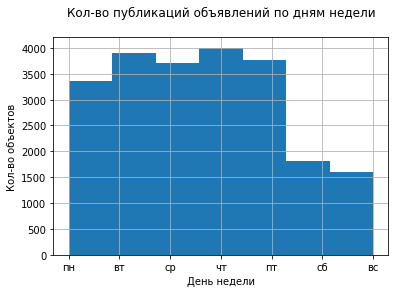

In [45]:
data['weekday_of_exposition'].hist(bins=7).set(xlabel='День недели', ylabel='Кол-во объектов', \
                                               title='Кол-во публикаций объявлений по дням недели\n')
plt.xticks(sorted(data['weekday_of_exposition'].unique().tolist()), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']);

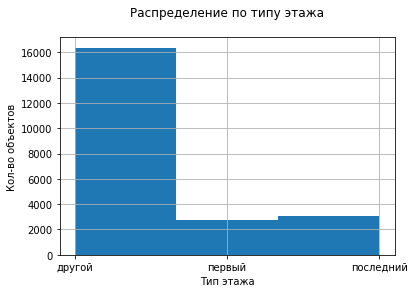

In [46]:
data['floor_type'].hist(bins=3).set(xlabel='Тип этажа', ylabel='Кол-во объектов', title='Распределение по типу этажа\n');

**Вывод:**

1. Распределение данных по общей площади, жилой площади и площади кухни близки к нормальным, но справа имеют длинный хвост, так как есть редко встречающиеся высокие значения, по сравнению с основной массой данных.
2. Цена недвижимости имеет нормальное распределение с хвостом уходящим вправо из-за редких высоких значений.
3. Квартир, имеющих 1-2 комнаты в выборке встречаются чаще всего (их около 60%), также достаточно много квартир, имеющих 3 комнаты. При этом квартир, иеющих 7-10 комнат практически нет.
4. Высота потолков находится в основном в пределах 2.4 м - 2.7 м, однако есть и аномально высокие значения более 3,5 м.
5. Большая часть квартир, выставленных на продажу, находится на 1-5 этаже. Это можно объяснить тем, что в выборке наиболее часто  встречаются пятиэтажные дома.
6. Для тех объектов, у которых подгружены картографические данные:
- Расстояние до центра для большинства объектов составляет 5 км (ближе к центру), либо 11-16 км (в районе КАД).
- Расстояние до аэропорта для большинства объектов составляет 10-25 км (в основном районы внутри КАД), также имеется пик на расстоянии 34-35 км (объекты в поселках и деревнях за пределами КАД).
- Расстояние до парков для большинства объектов варьируется от 200 м до 700 м.
7. Большинство публикаций объявлений происходит в период с февраля по апрель и с октября по ноябрь. При этом чаще всего объявления публикуют в будние дни, среди которых выделяется вторник и четверг. Наименьшая активность наблюдается в декабре, январе и мае, что объясняется большим количеством праздников.
8. Квартир, расположенных на первом и последнем этаже в целом меньше, чем квартир на других этажах. При этом квартир на 1 этаже меньше, чем на последнем, что может быть связано с тем, что первые этажи часто используются под коммерческие помещения.

Посмотрим, как быстро продавались квартиры.

Согласно правилам размещения объявлений на сайте Яндекс.Недвижимость срок бесплатного размещения для Санкт-Петербурга и области составляет 120 дней, далее оплачивается каждые 30 дней размещения.

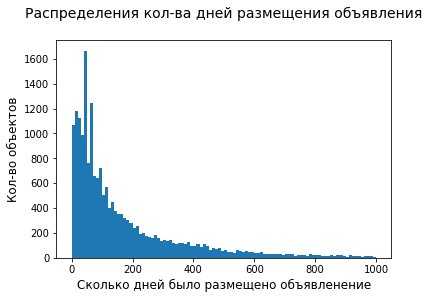

In [47]:
ax = data.plot(y='days_exposition', kind='hist', bins=100, range=(0, 1000), legend=False)
ax.set_title('Распределения кол-ва дней размещения объявления\n', fontsize=14)
ax.set_xlabel('Сколько дней было размещено объявленение', fontsize=12)
ax.set_ylabel('Кол-во объектов', fontsize=12);

In [48]:
stat_days_exposition = (
    data['days_exposition']
    .apply(['count', 'mean', 'median', lambda x: x.mode()[0], 'min', 'max'])
    .round()
    .to_frame()
)
stat_days_exposition.index = ['count', 'mean', 'median', 'mode', 'min', 'max']
display(stat_days_exposition)
print(data['days_exposition'].describe())

,days_exposition
count,19255.0
mean,166.0
median,92.0
mode,45.0
min,1.0
max,999.0


count    19255.000000
mean       165.823111
std        186.200545
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max        999.000000
Name: days_exposition, dtype: float64


Мода составила 45 дней, что говорит о том, что наибольшее количество объявлений было снято к этому сроку. Медиана составила 92 дня, значит половина всех объявлений висела не более 92 дней. Среднее оказалось почти в два раза выше засчет скошенности вправо набора данных.

Проверим гипотезу о том, что срок снятия с публикации зависит от стоимости недвижимости. В правилах публикации для регионов объявление может висеть бесплатно 45 дней для квартир до 4,5 млн, 60 дней для квартир от 4,5 до 10 млн и 90 дней для квартир от 10 млн, затем каждые 30 дней необходимо оплачивать по специальному тарифу.

In [49]:
def price_type(row):
    if row['last_price'] <= 0:
        raise ValueError(f'Некорректное значение стоимости {row["floor"]} при формировании типа стоимости')
    
    if row['last_price'] < 4.5e6:
        return 'до 4,5 млн'
    
    if row['last_price'] >= 4.5e6 and row['last_price'] < 10e6:
        return 'от 4,5 до 10 млн'
    
    return 'от 10 млн'

In [50]:
data['price_type'] = data.apply(price_type, axis=1)

In [51]:
stat = (
    data
    .pivot_table(index='price_type', values='days_exposition', 
                 aggfunc=['count', 'mean', 'median', lambda x: x.mode()[0], 'min', 'max'])
)
stat.columns = ['count', 'mean', 'median', 'mode', 'min', 'max']
display(stat.style.format({'mean' : '{:.0f}', 'median' : '{:.0f}'}))

,count,mean,median,mode,min,max
price_type,,,,,,
"до 4,5 млн",9646,154,84,45,1,996
от 10 млн,1546,226,137,90,3,998
"от 4,5 до 10 млн",8063,169,96,60,2,999


Значение моды совпало со сроком бесплатного объявления в регионах в зависимости от стоимости. Возможно раньше такие правила распространялись на все регионы .

**Вывод:**

Срок снятия объявлений с публикации зависит от стоимости недвижимости. Мода срока снятия объявления с публикации составила 45 дней для квартир до 4,5 млн, 60 дней для квартир от 4,5 до 10 млн и 90 дней для квартир от 10 млн, что совпало с бесплатным сроком публикации объявлений для регионов. Возможно потом пользователи перезаводили объявление, чтобы оно опять крутилось бесплатно.

Продажи можно считать быстрыми, если объявления сняли с публикации до окончания бесплатного срока, так как в таком случае снятие вряд ли связано с тем, что дальше необходимо оплачивать публикацию. 25% значений лежат за пределами 219 дней, такой срок продажи можно считать необычно долгим.

Посмотрим, как зависит цена на недвижимость от общей площади, жилой площади и площади кухни.

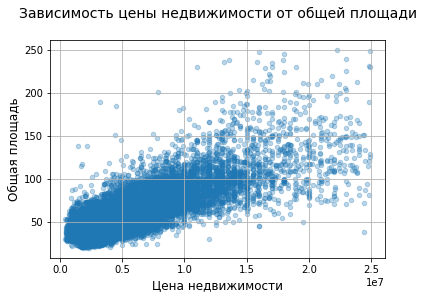

In [52]:
ax = data.plot(x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.3)
ax.set_title('Зависимость цены недвижимости от общей площади\n', fontsize=14)
ax.set_xlabel('Цена недвижимости', fontsize=12)
ax.set_ylabel('Общая площадь', fontsize=12);

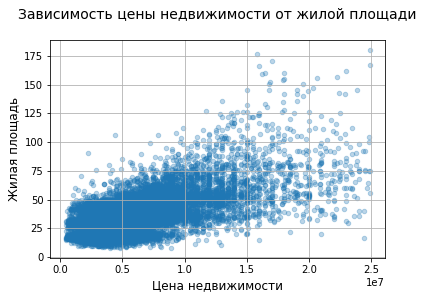

In [53]:
ax = data.plot(x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.3)
ax.set_title('Зависимость цены недвижимости от жилой площади\n', fontsize=14)
ax.set_xlabel('Цена недвижимости', fontsize=12)
ax.set_ylabel('Жилая площадь', fontsize=12);

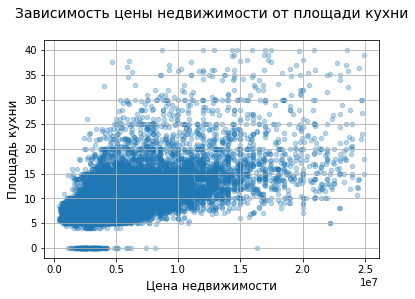

In [54]:
ax = data.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.3)
ax.set_title('Зависимость цены недвижимости от площади кухни\n', fontsize=14)
ax.set_xlabel('Цена недвижимости', fontsize=12)
ax.set_ylabel('Площадь кухни', fontsize=12);

In [55]:
data_area = data.loc[(data['kitchen_area'] > 0), ['last_price', 'total_area', 'living_area', 'kitchen_area']]
print(data_area.corr())

              last_price  total_area  living_area  kitchen_area
last_price      1.000000    0.781781     0.674911      0.589835
total_area      0.781781    1.000000     0.933090      0.537018
living_area     0.674911    0.933090     1.000000      0.297561
kitchen_area    0.589835    0.537018     0.297561      1.000000


**Вывод:**

* На участке стоимости до 15 млн и общей площади до 150 м$^2$ цена растет линейно с ростом площади квартиры, за пределами данного участка появляется достаточно большое количество точек идущих вразнобой. Так, например, квартиры с площадью менее 100 м$^2$ и более 200 м$^2$ имеют одинаковую цену.
* Стоимость в зависимости от жилой площади также имеет линейный участок до 15 млн и 100 м$^2$, за пределами этого участка точки идут вразнобой.
* На графике зависимости цены от площади кухни видно, что большая часть точек расположена в пределах цены до 15 млн и площади до 20 м$^2$. Однако в целом видно, что площадь кухни не сильно влияет на стоимость недвижимости.

По построенной выше матрице корреляций видно, что наиболее высокая корреляция наблюдается между ценой квартиры и общей площадью, наименьшая - между ценой и площадью кухни. (Рассматриваем первый столбец, так как в данном случае нам важна зависимость цены от площадей).

Посмотрим на зависимость цены квартиры от количества комнат.

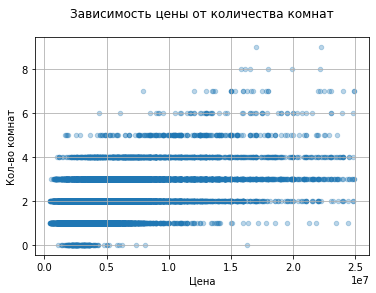

In [56]:
data.plot(x='last_price', y='rooms', kind='scatter', grid=True, alpha=0.3, title='Зависимость цены от количества комнат\n', \
         xlabel='Цена', ylabel='Кол-во комнат');

**Вывод:**

* Квартиры с 0 комнат (студии) имеют стоимость от 1 млн до 5 млн. Также есть редкие значения от 5 до 8 млн.
* У квартир с 1-3 комнатами стоимость начинается от 400-500 тыс. и доходит до 25 млн.
* У квартир с 4 комнатами стоимость начинается с 1 млн и доходит до 25 млн.
* У квартир с 5 комнатами нижняя граница стоимости начинается с 1.5 млн, с 6 комнатами - с 5 млн.
* Квартиры с 7-10 комнатами стоят выше 12 млн.

С увеличением количества комнат растет нижняя граница стоимости недвижимости, при этом у студий нижняя граница изначально немного сдвинута в большую сторону. Однако верхняя граница цен для квартир с любым количеством комнат может доходить до 25 млн. Основная масса квартир находится в диапазоне 0-5 комнат и стоимости до 15 млн.

Посмотрим на зависимость средней цены от типа этажа.

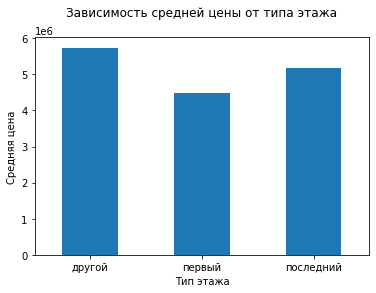

In [57]:
data.pivot_table(index='floor_type', values='last_price').plot(kind='bar', legend=False, ylabel='Средняя цена',\
                                                               xlabel='Тип этажа', rot=0, \
                                                              title='Зависимость средней цены от типа этажа\n');

**Вывод:**

Квартиры на первом и последнем этаже в среднем дешевле, чем квартиры на других этажах.

Посмотрим на зависимость средней цены от дня недели, месяца и года размещения.

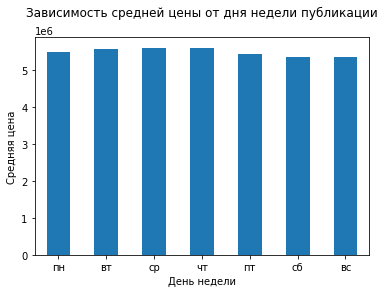

In [58]:
data.pivot_table(index='weekday_of_exposition', values='last_price').plot(kind='bar', legend=False, ylabel='Средняя цена',\
                                                               xlabel='День недели', rot=0, \
                                                               title='Зависимость средней цены от дня недели публикации\n')
plt.xticks(sorted(data['weekday_of_exposition'].unique().tolist()), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']);

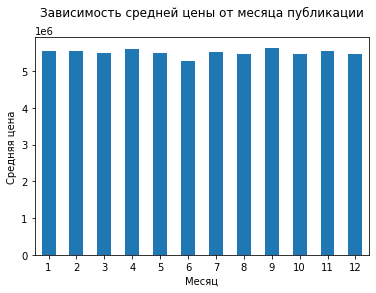

In [59]:
data.pivot_table(index='month_of_exposition', values='last_price').plot(kind='bar', legend=False, ylabel='Средняя цена',\
                                                               xlabel='Месяц', rot=0, \
                                                               title='Зависимость средней цены от месяца публикации\n');

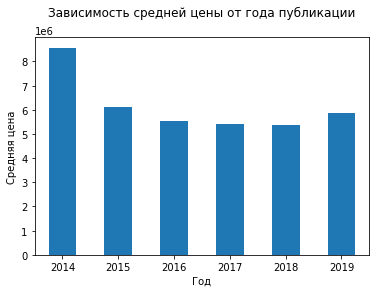

In [60]:
data.pivot_table(index='year_of_exposition', values='last_price').plot(kind='bar', legend=False, ylabel='Средняя цена',\
                                                               xlabel='Год', rot=0, \
                                                               title='Зависимость средней цены от года публикации\n');

In [61]:
data.year_of_exposition.value_counts().to_frame().sort_index()

,year_of_exposition
2014,76
2015,915
2016,2597
2017,7755
2018,8108
2019,2726


Проверим гипотезу, что повышение средней стоимости в 2019 году связана с тем, что отсутствуют данные за вторую половину 2019 года. Посмотрим как изменялась стоимость по годам за январь-май (за 2019 год данные иеются с января по май).

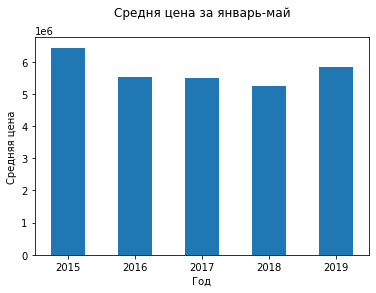

In [62]:
sample = data[(data['year_of_exposition'] >= 2015) & (data['year_of_exposition'] <= 2019) & \
              (data['month_of_exposition'] >= 1) & (data['month_of_exposition'] <= 5)]

sample.pivot_table(index='year_of_exposition', values='last_price').plot(kind='bar', legend=False, ylabel='Средняя цена',\
                                                               xlabel='Год', rot=0, title='Средня цена за январь-май\n');

Из графика выше видно, что в 2019 году средняя стоимость действительно увеличилась, по сравнению с 2015-2018 годом.

**Вывод:**

В 2014 году средняя стоимость недвижимости наиболее высокая, в период с 2015 по 2018 стоимость уменьшилась в среднем более, чем на 3 млн, в 2019 году заметен небольшой рост стоимости. В 2014 году сервисом пользовалась малая часть людей с более высокой средней стоимостью недвижимости, в последующие года появилось большое кол-во продавцов с более доступными предложениями цены, что повлияло на уменьшение среднего значения.
 
От дня недели и месяца публикации цена квартир не зависит.

Посчитаем среднюю стоимость одного квадратного метра в населенных пунктах и выведем 10 населенных пунктов с наибольшим число объявлений.

In [63]:
stat_one_meter = data.pivot_table(index='locality_name', values='one_square_meter_price', aggfunc=['count', 'mean'])
stat_one_meter.columns = ['quantity', 'avg_one_square_meter_price']
stat_one_meter_max_quantity_10 = stat_one_meter.sort_values(by='quantity', ascending=False).round().head(10)
stat_one_meter_max_quantity_10

,quantity,avg_one_square_meter_price
locality_name,,
Санкт-Петербург,14503,109119.0
Мурино,560,85874.0
Кудрово,457,95105.0
поселок Шушары,429,78465.0
Всеволожск,379,68524.0
Пушкин,346,101953.0
Колпино,331,75327.0
поселок Парголово,317,89920.0
Гатчина,300,68694.0


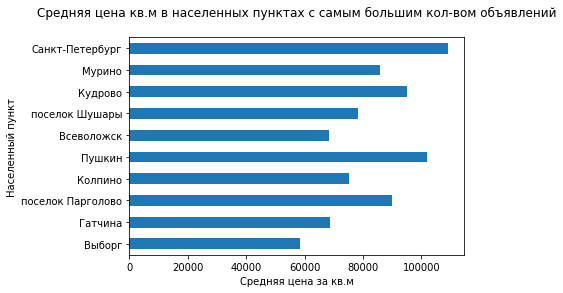

In [64]:
(
    stat_one_meter_max_quantity_10.sort_values(by='quantity')['avg_one_square_meter_price']
    .plot(kind='barh', legend=False, xlabel='Населенный пункт', 
          title='Средняя цена кв.м в населенных пунктах с самым большим кол-вом объявлений\n')
    .set_xlabel('Средняя цена за кв.м')
);

Выведем 10 населенных пунктов с самой высокой и самой низкой стоимостью квадратного метра. При этом для большей достоверности результатов будем брать населенные пункты, у которых более 10 объявлений.

In [65]:
stat_one_meter_max_price = stat_one_meter.query('quantity > 10').sort_values(by='avg_one_square_meter_price', \
                                                                             ascending=False).round().head(10)
stat_one_meter_max_price

,quantity,avg_one_square_meter_price
locality_name,,
Зеленогорск,24,115123.0
Санкт-Петербург,14503,109119.0
Сестрорецк,178,101957.0
Пушкин,346,101953.0
деревня Мистолово,11,98550.0
unknown,47,95279.0
Кудрово,457,95105.0
поселок Парголово,317,89920.0
поселок Стрельна,41,88331.0


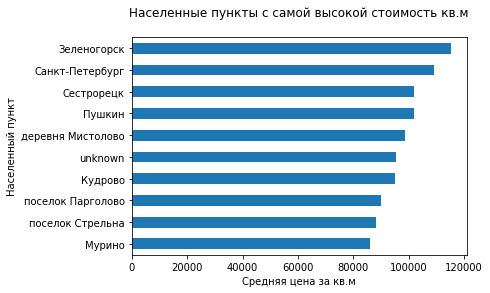

In [66]:
(
    stat_one_meter_max_price['avg_one_square_meter_price']
    .sort_values()
    .plot(kind='barh', legend=False, xlabel='Населенный пункт', 
          title='Населенные пункты с самой высокой стоимость кв.м\n')
    .set_xlabel('Средняя цена за кв.м')
);

In [67]:
stat_one_meter_min_price = stat_one_meter.query('quantity > 10').sort_values(by='avg_one_square_meter_price').round().head(10)
stat_one_meter_min_price

,quantity,avg_one_square_meter_price
locality_name,,
Бокситогорск,15,17457.0
Сланцы,107,18274.0
Пикалёво,18,18873.0
Подпорожье,17,27035.0
поселок городского типа Кузнечное,13,27544.0
Каменногорск,12,28845.0
поселок городского типа Назия,16,30586.0
поселок Елизаветино,13,31827.0
Лодейное Поле,19,32381.0


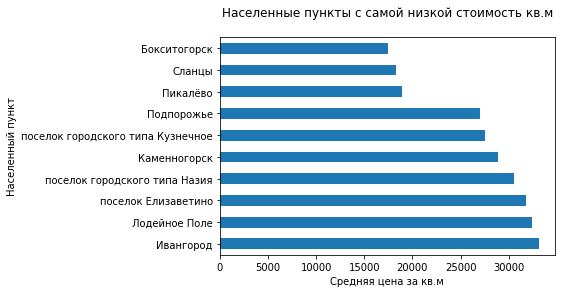

In [68]:
(
    stat_one_meter_min_price['avg_one_square_meter_price']
    .sort_values(ascending=False)
    .plot(kind='barh', legend=False, xlabel='Населенный пункт', 
          title='Населенные пункты с самой низкой стоимость кв.м\n')
    .set_xlabel('Средняя цена за кв.м')
);

**Вывод:**

* Наибольшее количество объявлений выставляется в Санкт-Петербурге - 14 790 объявлений, также в первую десятку вошли населенные пункты, в которых выставлено от 573 в Мурино до 233 объявлений в Выборге. При этом стоимость квадратного метра среди первой десятки находится в диапазоне от 109 тыс до 58 тыс.
* Самая высокая стоимость квадратного метра в поселке Зеленогорск (можно объяснить тем, что это курортный город, как и Сестрорецк), на втором месте оказался Санкт-Петербург. Таким образом, в первой десятке оказались крупные населенные пункты и курортные города. Стоимость одного квадратного метра для наиболее дорогих населенных пунктов находится в диапазоне от 115 тыс до 86 тыс. Также на шестом месте оказались значения *unknown*, для которых названия городов пропущены, значит в данных объявлениях также дорогая недвижимость.
* Наименьшую стоимость квадратного метра имеют населенные пункты расположенные на большом расстоянии от Санкт-Петербурга. Стоимость квадротного метра для них варьируется от 17 тыс до 32 тыс.

Посмотрим, как стоимость объектов зависит от расстояния до центра города.

In [69]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург'].reset_index()

In [70]:
data_spb_km_price = data_spb.pivot_table(index='city_centers_nearest_km', values='one_square_meter_price').reset_index()
data_spb_km_price.style.format({'city_centers_nearest_km': '{:.0f}', 'one_square_meter_price': '{:,.0f}'})

,city_centers_nearest_km,one_square_meter_price
0,0,"112,706"
1,1,"129,132"
2,2,"123,764"
3,3,"114,159"
4,4,"122,310"
5,5,"127,495"
6,6,"128,542"
7,7,"127,104"
8,8,"121,847"
9,9,"111,675"


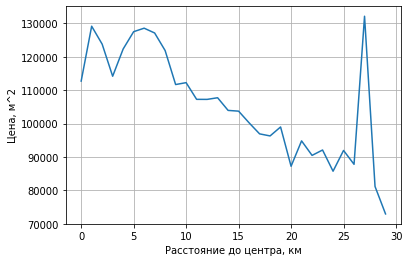

In [71]:
data_spb_km_price.plot(x='city_centers_nearest_km', y='one_square_meter_price', legend=False, xlabel='Расстояние до центра, км', \
                      ylabel='Цена, м^2', grid=True);

**Вывод:**

Стоимость квадратного метра уменьшается с увеличением расстояния от центра города. На графике есть пик на расстоянии 27 км, который выбивается из общего тренда, что связано с тем, что на расстоянии 27 км находится всего две квартиры, стоимость квадратного метра одной из них имеет аномально высокое значение, из-за чего среднее завышено.

### Общий вывод

**1. Исследование длительности размещения объявления**

Срок снятия объявлений с публикации зависит от стоимости недвижимости. Мода срока снятия объявления с публикации составила 45 дней для квартир до 4,5 млн, 60 дней для квартир от 4,5 до 10 млн и 90 дней для квартир от 10 млн, что совпало с бесплатным сроком публикации объявлений для регионов. Возможно потом пользователи перезаводили объявление, чтобы оно опять крутилось бесплатно.

Продажи можно считать быстрыми, если объявления сняли с публикации до окончания бесплатного срока, так как в таком случае снятие вряд ли связано с тем, что дальше необходимо оплачивать публикацию. 25% значений лежат за пределами 219 дней, такой срок продажи можно считать необычно долгим.

**2. Исследование зависимости цены от общей площади, жилой площади, площади кухни**

* Стоимость недвижимости для большинства объектов линейно увеличивается с увеличением общей и жилой площади, однако в диапазоне стоимости от 15 до 25 млн присутствуют значения с аномально высокой площадью.
* Площадь кухни не сильно влияет на цену.
* Наиболее высокая корреляция наблюдается между ценой квартиры и общей площадью, наименьшая - между ценой и площадью кухни.

**3. Исследование зависимости цены от количества комнат, этажа и даты размещения**

1. С увеличением количества комнат растет нижняя граница стоимости недвижимости, при этом у студий нижняя граница изначально немного сдвинута в большую сторону. Однако верхняя граница цен для квартир с любым количеством комнат может доходить до 25 млн. Основная масса квартир нахожится в диапазоне 0-5 комнат и стоимости до 15 млн.
2. Квартиры на первом и последнем этаже в среднем дешевле, чем квартиры на других этажах.
3. В 2014 году средняя стоимость недвижимости наиболее высокая, в период с 2015 по 2018 стоимость уменьшилась в среднем более, чем на 3 млн, в 2019 году заметен небольшой рост стоимости. В 2014 году сервисом пользовалась малая часть людей с более высокой средней стоимостью недвижимости, в последующие года появилось большое кол-во продавцов с более доступными предложениями цены, что повлияло на уменьшение среднего значения.
4. От дня недели и месяца публикации цена квартир не зависит.


**4. Исследование стоимости квадратного метра в населенных пунктах**

* Наибольшее количество объявлений выставляется в Санкт-Петербурге - 14 790 объявлений, также в первую десятку вошли населенные пункты, в которых выставлено от 573 в Мурино до 233 объявлений в Выборге. При этом стоимость квадратного метра среди первой десятки находится в диапазоне от 109 тыс до 58 тыс.
* Самая высокая стоимость квадратного метра в поселке Зеленогорск (можно объяснить тем, что это курортный город, как и Сестрорецк), на втором месте оказался Санкт-Петербург. Таким образом, в первой десятке оказались крупные населенные пункты и курортные города. Стоимость одного квадратного метра для наиболее дорогих населенных пунктов находится в диапазоне от 115 тыс до 86 тыс. Также на шестом месте оказались значения *unknown*, для которых названия городов пропущены, значит в данных объявлениях также дорогая недвижимость.
* Наименьшую стоимость квадратного метра имеют населенные пункты расположенные на большом расстоянии от Санкт-Петербурга. Стоимость квадротного метра для них варьируется от 17 тыс до 32 тыс.

**5. Исследование зависимости стоимости объектов в Санкт-Петербурге от расстояния до центра города.**

Стоимость квадратного метра уменьшается с увеличением расстояния от центра города.

**Рекомендации:**

В дальнейшем для определения рыночной стоимости недвижимости можно использовать такие параметры, как:

* Общая площадь;
* Жилая площадь;
* Количество комнат;
* Этаж;
* Расстояние до центра города, если это крупный город;
* Расстояние до крупного города.